In [1]:
# imports
import pandas as pd
import numpy as np

# load data
pd.set_option('display.max_rows', 10000) 
pd.set_option('display.max_columns', 1000)
df_real = pd.read_csv('~/Desktop/data.csv')
df_synth = pd.read_csv('~/Desktop/wr_synth.csv')

In [9]:
df_real.head()

# "age": {
#     "type": "numerical",
#     "subtype": "integer",
# },
# "paid_amt": {
#     "type": "numerical",
#     "subtype": "float",
# }

,DR,DP,Age_In_Draft_Yr,BOA_20%,BOA_30%,Career_YPR,Career_REC/g,Career_College_Dominator_Rating,Career_Per_Game_College_Dominator_Rating,Career_Weighted_Dominator,Career_YPTpA_Dominator,Career_Yards_Dominator,First_RecYds/TmPatt,Best_RecYds/TmPatt,Last_RecYds/TmPatt,AVG_RecYds/TmPatt,First_RecYds/TmPatt_Above_Conference_AVg,Best_RecYds/TmPatt_Above_Conference_Avg,Last__RecYds/TmPatt_Above_Conference_Avg,AVG__RecYds/TmPatt_Above_Conference_Avg,First_RecYds/TmPatt_Above_AGE_Avg,Best_RecYds/TmPatt_Above_AGE_Avg,Last__RecYds/TmPatt_Above_AGE_Avg,AVG__RecYds/TmPatt_Above_AGE_Avg,First_RecYds/TmPatt_Above_Experience_Avg,Best_RecYds/TmPatt_Above_Experience_Avg,Last__RecYds/TmPatt_Above_Experience_Avg,AVG__RecYds/TmPatt_Above_Experience_Avg,First_Dominator,Best_Dominator,Last_Dominator,AVG_Dominator_(Min_2_Seasons),First_Weighted_Dominator,Best_Weighted_Dominator,Last_Weighted_Dominator,AVG_Weighted_Dominator_(Min_2_Seasons),First_Doa,Last_Doa,Best_Doa,Doa_(AVG),TeamMate_Score,Avg_Rec/G,Avg_RecYd/G,Best_RecTd,Best_MS_RECs_(>=6_Gms),Last_MS_RECs_(>=6_Gms),Avg_MS_RECs_(>=6_Gms),Best_MS_REC_Yards_(>=6_Gms),Last_MS_REC_Yards_(>=6_Gms),Avg_MS_REC_Yards_(>=6_Gms),Best_MS_Yards_above/below_Average_by_age_(top_24_players),Last_MS_Yards_above/below_Average_by_age_(top_24_players),Avg_MS_Yards_above/below_Average_by_age_(top_24_players),Best_Player_Above/Below_AVG_Conference_REC_Yds_MS_>6_games,Last_Player_Above/Below_AVG_Conference_REC_Yds_MS_>6_games,Avg_Player_Above/Below_AVG_Conference_REC_Yds_MS_>6_games,Best_Player_Above/Below_AVG_Team_REC_Yds_MS,Last_Player_Above/Below_AVG_Team_REC_Yds_MS,Avg_Player_Above/Below_AVG_Team_REC_Yds_MS,Best_MS_REC_TDs__(>=6_Gms),Last_MS_REC_TDs__(>=6_Gms),Avg_MS_REC_TDs__(>=6_Gms),Best_YTMpA_(Rec_Yards_Per_Team_Pass_Attempt)_>6_games,Last_YTMpA_(Rec_Yards_Per_Team_Pass_Attempt)_>6_games,Avg_YTMpA_(Rec_Yards_Per_Team_Pass_Attempt)_>6_games,Best_Team_Adjusted_YTMpA,Last_Team_Adjusted_YTMpA,Avg_Team_Adjusted_YTMpA,BMI,weight,height,bench,3Cone,shuttle,vert,broadInches,Burst_Score,Adjusted_40_Time,Y1-Y3_PPR_ PPG
0,1.0,12.0,21,19.0,20.0,16.36,3.67,0.53,0.35,0.53,3.53,0.35,1.84,3.53,3.53,2.47,-0.19,1.52,1.52,0.45,0.23,1.10,1.10,0.49,0.37,0.34,0.37,0.35,0.17,0.35,0.35,0.25,0.16,0.35,0.35,0.24,-0.04,0.04,0.04,-0.01,0.02,3.67,60.00,8.0,0.18,0.18,0.15,0.35,0.35,0.28,0.05,0.05,0.03,0.15,0.15,0.08,0.12,0.12,0.05,0.35,0.35,0.20,3.53,3.53,2.47,1.44,1.44,0.48,27.62,198.0,71.0,7.0,6.69,3.94,38.5,122.0,126.45,4.43,21.18
1,1.0,22.0,21,19.0,19.0,14.64,5.89,0.44,0.30,0.42,2.72,0.28,2.27,2.72,2.72,2.49,0.18,0.64,0.64,0.41,0.37,0.37,0.29,0.33,0.18,0.34,0.34,0.26,0.32,0.32,0.28,0.30,0.32,0.32,0.28,0.30,0.08,-0.03,0.08,0.02,0.03,5.89,86.25,18.0,0.20,0.20,0.17,0.29,0.26,0.28,0.05,-0.05,0.00,0.09,0.05,0.07,0.05,0.02,0.04,0.35,0.30,0.32,2.72,2.72,2.49,0.44,0.44,0.08,26.65,22.0,73.0,NaN,NaN,NaN,37.5,126.0,126.75,4.43,19.47
2,2.0,47.0,23,21.0,22.0,14.36,3.93,0.59,0.40,0.52,2.41,0.32,1.96,2.41,2.41,2.19,0.06,0.57,0.57,0.32,-0.60,-0.18,-0.18,-0.39,0.19,0.37,0.37,0.28,0.21,0.40,0.40,0.31,0.21,0.40,0.40,0.31,-0.10,0.07,0.07,-0.01,-0.01,3.93,56.43,9.0,0.17,0.17,0.15,0.32,0.32,0.27,0.02,0.02,-0.04,0.31,0.31,0.11,0.29,0.29,0.09,0.47,0.47,0.34,2.41,2.41,2.19,0.94,0.94,0.70,26.50,212.0,75.0,18.0,6.80,4.13,35.0,126.0,122.50,4.57,17.65
3,1.0,4.0,23,20.0,22.0,15.78,5.19,0.48,0.45,0.45,3.41,0.29,2.42,3.41,3.41,2.96,0.45,1.51,1.51,1.02,-0.01,0.82,0.82,0.44,0.84,1.46,1.46,1.07,0.28,0.45,0.45,0.37,0.28,0.31,0.31,0.29,-0.03,-0.02,-0.02,-0.02,-0.01,5.19,81.84,9.0,0.16,0.16,0.15,0.31,0.27,0.28,0.00,-0.03,-0.02,0.25,0.25,0.10,0.26,0.26,0.11,0.36,0.36,0.30,3.41,3.41,2.96,1.27,1.27,0.77,25.68,211.0,76.0,18.0,6.91,4.21,34.5,126.0,121.65,4.49,17.54
4,1.0,6.0,22,19.0,19.0,14.82,4.48,0.50,0.34,0.52,3.13,0.36,2.77,3.13,3.13,2.58,1.01,1.13,1.13,0.70,0.87,0.87,0.56,0.29,1.78,0.95,1.78,1.01,0.37,0.37,0.31,0.31,0.37,0.37,0.31,0.31,0.13,0.00,0.13,0.02,0.00,4.48,66.33,7.0,0.22,0.22,0.17,0.39,0.33,0.32,0.14,0.02,0.03,0.18,0.05,0.08,0.17,0.02,0.07,0.36,0.29,0.30,3.13,3.13,

In [13]:
metadata = {
    "primary_key": None,
    "fields": { 
        'DR': {'type': 'numerical', 'subtype': 'integer'}, 
        'DP': {'type': 'numerical', 'subtype': 'integer'}, 
        'Age_In_Draft_Yr': {'type': 'numerical', 'subtype': 'integer'}, 
        'BOA_20%': {'type': 'numerical', 'subtype': 'integer'}, 
        'BOA_30%': {'type': 'numerical', 'subtype': 'integer'}, 
        'Career_YPR': {'type': 'numerical', 'subtype': 'float'},
        'Career_REC/g': {'type': 'numerical', 'subtype': 'float'}, 
        'Career_College_Dominator_Rating': {'type': 'numerical', 'subtype': 'float'},
        'Career_Per_Game_College_Dominator_Rating': {'type': 'numerical', 'subtype': 'float'}, 
        'Career_Weighted_Dominator': {'type': 'numerical', 'subtype': 'float'},
        'Career_YPTpA_Dominator': {'type': 'numerical', 'subtype': 'float'}, 
        'Career_Yards_Dominator': {'type': 'numerical', 'subtype': 'float'},
        'First_RecYds/TmPatt': {'type': 'numerical', 'subtype': 'float'}, 
        'Best_RecYds/TmPatt': {'type': 'numerical', 'subtype': 'float'}, 
        'Last_RecYds/TmPatt': {'type': 'numerical', 'subtype': 'float'},
        'AVG_RecYds/TmPatt': {'type': 'numerical', 'subtype': 'float'}, 
        'First_RecYds/TmPatt_Above_Conference_AVg': {'type': 'numerical', 'subtype': 'float'},
        'Best_RecYds/TmPatt_Above_Conference_Avg': {'type': 'numerical', 'subtype': 'float'},
        'Last__RecYds/TmPatt_Above_Conference_Avg': {'type': 'numerical', 'subtype': 'float'},
        'AVG__RecYds/TmPatt_Above_Conference_Avg': {'type': 'numerical', 'subtype': 'float'},
        'First_RecYds/TmPatt_Above_AGE_Avg': {'type': 'numerical', 'subtype': 'float'}, 
        'Best_RecYds/TmPatt_Above_AGE_Avg': {'type': 'numerical', 'subtype': 'float'},
        'Last__RecYds/TmPatt_Above_AGE_Avg': {'type': 'numerical', 'subtype': 'float'}, 
        'AVG__RecYds/TmPatt_Above_AGE_Avg': {'type': 'numerical', 'subtype': 'float'},
        'First_RecYds/TmPatt_Above_Experience_Avg': {'type': 'numerical', 'subtype': 'float'},
        'Best_RecYds/TmPatt_Above_Experience_Avg': {'type': 'numerical', 'subtype': 'float'},
        'Last__RecYds/TmPatt_Above_Experience_Avg': {'type': 'numerical', 'subtype': 'float'},
        'AVG__RecYds/TmPatt_Above_Experience_Avg': {'type': 'numerical', 'subtype': 'float'},
        'First_Dominator': {'type': 'numerical', 'subtype': 'float'},
        'Best_Dominator': {'type': 'numerical', 'subtype': 'float'}, 
        'Last_Dominator': {'type': 'numerical', 'subtype': 'float'}, 
        'AVG_Dominator_(Min_2_Seasons)': {'type': 'numerical', 'subtype': 'float'},
        'First_Weighted_Dominator': {'type': 'numerical', 'subtype': 'float'}, 
        'Best_Weighted_Dominator': {'type': 'numerical', 'subtype': 'float'},
        'Last_Weighted_Dominator': {'type': 'numerical', 'subtype': 'float'}, 
        'AVG_Weighted_Dominator_(Min_2_Seasons)': {'type': 'numerical', 'subtype': 'float'},
        'First_Doa': {'type': 'numerical', 'subtype': 'float'}, 
        'Last_Doa': {'type': 'numerical', 'subtype': 'float'}, 
        'Best_Doa': {'type': 'numerical', 'subtype': 'float'}, 
        'Doa_(AVG)': {'type': 'numerical', 'subtype': 'float'}, 
        'TeamMate_Score': {'type': 'numerical', 'subtype': 'float'},
        'Avg_Rec/G': {'type': 'numerical', 'subtype': 'float'}, 
        'Avg_RecYd/G': {'type': 'numerical', 'subtype': 'float'}, 
        'Best_RecTd': {'type': 'numerical', 'subtype': 'float'}, 
        'Best_MS_RECs_(>=6_Gms)': {'type': 'numerical', 'subtype': 'float'},
        'Last_MS_RECs_(>=6_Gms)': {'type': 'numerical', 'subtype': 'float'}, 
        'Avg_MS_RECs_(>=6_Gms)': {'type': 'numerical', 'subtype': 'float'},
        'Best_MS_REC_Yards_(>=6_Gms)': {'type': 'numerical', 'subtype': 'float'}, 
        'Last_MS_REC_Yards_(>=6_Gms)': {'type': 'numerical', 'subtype': 'float'},
        'Avg_MS_REC_Yards_(>=6_Gms)': {'type': 'numerical', 'subtype': 'float'},
        'Best_MS_Yards_above/below_Average_by_age_(top_24_players)': {'type': 'numerical', 'subtype': 'float'},
        'Last_MS_Yards_above/below_Average_by_age_(top_24_players)': {'type': 'numerical', 'subtype': 'float'},
        'Avg_MS_Yards_above/below_Average_by_age_(top_24_players)': {'type': 'numerical', 'subtype': 'float'},
        'Best_Player_Above/Below_AVG_Conference_REC_Yds_MS_>6_games': {'type': 'numerical', 'subtype': 'float'},
        'Last_Player_Above/Below_AVG_Conference_REC_Yds_MS_>6_games': {'type': 'numerical', 'subtype': 'float'},
        'Avg_Player_Above/Below_AVG_Conference_REC_Yds_MS_>6_games': {'type': 'numerical', 'subtype': 'float'},
        'Best_Player_Above/Below_AVG_Team_REC_Yds_MS': {'type': 'numerical', 'subtype': 'float'},
        'Last_Player_Above/Below_AVG_Team_REC_Yds_MS': {'type': 'numerical', 'subtype': 'float'},
        'Avg_Player_Above/Below_AVG_Team_REC_Yds_MS': {'type': 'numerical', 'subtype': 'float'},
        'Best_MS_REC_TDs__(>=6_Gms)': {'type': 'numerical', 'subtype': 'float'}, 
        'Last_MS_REC_TDs__(>=6_Gms)': {'type': 'numerical', 'subtype': 'float'},
        'Avg_MS_REC_TDs__(>=6_Gms)': {'type': 'numerical', 'subtype': 'float'},
        'Best_YTMpA_(Rec_Yards_Per_Team_Pass_Attempt)_>6_games': {'type': 'numerical', 'subtype': 'float'},
        'Last_YTMpA_(Rec_Yards_Per_Team_Pass_Attempt)_>6_games': {'type': 'numerical', 'subtype': 'float'},
        'Avg_YTMpA_(Rec_Yards_Per_Team_Pass_Attempt)_>6_games': {'type': 'numerical', 'subtype': 'float'},
        'Best_Team_Adjusted_YTMpA': {'type': 'numerical', 'subtype': 'float'}, 
        'Last_Team_Adjusted_YTMpA': {'type': 'numerical', 'subtype': 'float'},
        'Avg_Team_Adjusted_YTMpA': {'type': 'numerical', 'subtype': 'float'}, 
        'BMI': {'type': 'numerical', 'subtype': 'float'}, 
        'weight': {'type': 'numerical', 'subtype': 'integer'}, 
        'height': {'type': 'numerical', 'subtype': 'integer'}, 
        'bench': {'type': 'numerical', 'subtype': 'integer'}, 
        '3Cone': {'type': 'numerical', 'subtype': 'float'},
        'shuttle': {'type': 'numerical', 'subtype': 'float'}, 
        'vert': {'type': 'numerical', 'subtype': 'float'},
        'broadInches': {'type': 'numerical', 'subtype': 'integer'}, 
        'Burst_Score': {'type': 'numerical', 'subtype': 'float'}, 
        'Adjusted_40_Time': {'type': 'numerical', 'subtype': 'float'},
        'Y1-Y3_PPR_ PPG': {'type': 'numerical', 'subtype': 'float'}
    }   
}

In [14]:
from sdmetrics.reports.single_table import QualityReport

report = QualityReport()
report.generate(df_real, df_synth, metadata)

Creating report: 100%|██████████| 4/4 [00:09<00:00,  2.27s/it]


Overall Quality Score: 74.72%

Properties:
Column Shapes: 69.91%
Column Pair Trends: 79.52%


In [16]:
report.get_details(property_name='Column Shapes')

,Column,Metric,Quality Score
0,DR,KSComplement,0.936081
1,DP,KSComplement,0.836097
2,Age_In_Draft_Yr,KSComplement,0.912138
3,BOA_20%,KSComplement,0.728567
4,BOA_30%,KSComplement,0.820968
5,Career_YPR,KSComplement,0.563658
6,Career_REC/g,KSComplement,0.796141
7,Career_College_Dominator_Rating,KSComplement,0.801614
8,Career_Per_Game_College_Dominator_Rating,KSComplement,0.613159
9,Career_Weighted_Dominator,KSComplement,0.516812


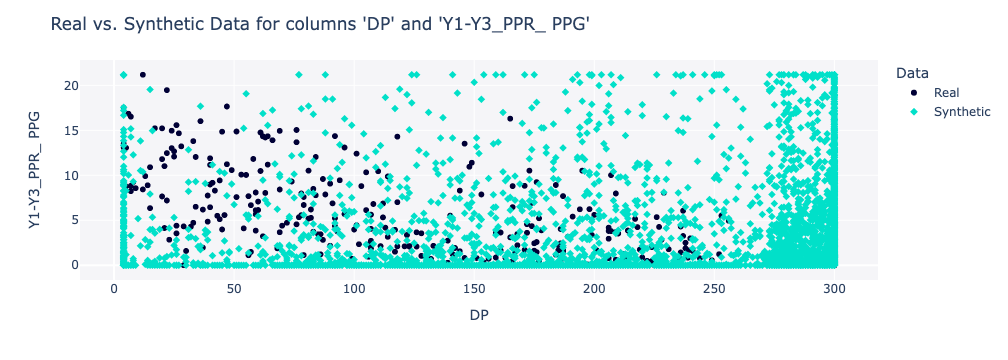

In [19]:
from sdmetrics.reports.utils import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=df_real,
    synthetic_data=df_synth,
    metadata=metadata,
    column_names=['DP', 'Y1-Y3_PPR_ PPG'],
)

fig.show()